In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import statsmodels.formula.api as sm

In [2]:
data=pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


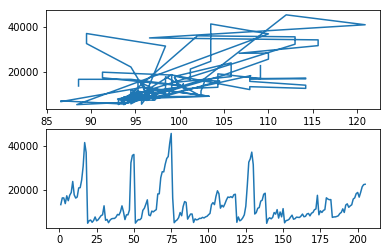

In [4]:
plt.subplot(2,1,1)
plt.plot(data.wheelbase,data.price)
plt.subplot(2,1,2)
plt.plot(data.car_ID,data.price)

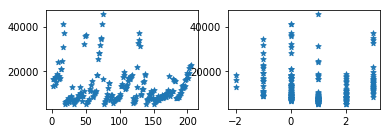

In [5]:
plt.subplot(2,2,1)
plt.scatter(data.car_ID,data.price,label="stars",s=30,marker="*")
plt.subplot(2,2,2)
plt.scatter(data.symboling,data.price,label="stars",s=30,marker="*")

In [6]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
data.columns[0:25]

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

(array([ 0.,  0.,  0.,  3., 22., 67., 54., 32., 27.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

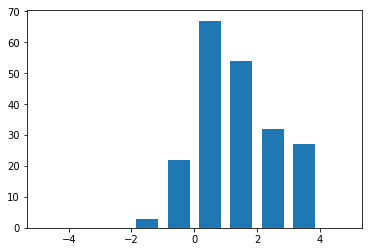

In [8]:
a=data.symboling
bins=10
range=(-5,5)
plt.hist(a,bins,range,histtype='bar',rwidth=0.7)

In [9]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
real_x=data.iloc[:,0:25].values
real_y=data.iloc[:,25].values

In [11]:
le=LabelEncoder()
real_x[:,2]=le.fit_transform(real_x[:,2])
real_x[:,3]=le.fit_transform(real_x[:,3])
real_x[:,4]=le.fit_transform(real_x[:,4])
real_x[:,5]=le.fit_transform(real_x[:,5])
real_x[:,6]=le.fit_transform(real_x[:,6])
real_x[:,7]=le.fit_transform(real_x[:,7])
real_x[:,8]=le.fit_transform(real_x[:,8])
real_x[:,14]=le.fit_transform(real_x[:,14])
real_x[:,15]=le.fit_transform(real_x[:,15])
real_x[:,17]=le.fit_transform(real_x[:,17])

In [12]:
real_x=real_x[:,1:]

In [13]:
ct=ColumnTransformer([("State",OneHotEncoder(),[2,6,7,14,15,17])],remainder='passthrough')
real_x=ct.fit_transform(real_x)

In [14]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [15]:
MLR=LinearRegression()
MLR.fit(training_x,training_y)
pred_y=MLR.predict(test_x)

In [16]:
test_y

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ,  8058. , 10595. , 16503. , 18399. ,
       10795. , 18420. ,  9960. ,  6229. ,  6479. , 15510. ])

In [17]:
pred_y

array([ 6181.27695802, 21431.93726527, 11879.96735692,  5137.51481717,
       11093.03965257, 11565.43939073,  5475.24652993,  3851.74978421,
       16307.5532681 ,  7546.91800805, 19845.23503458, 37598.75191676,
       12742.36045113,  8530.91316429,  6525.10149713,  9527.2876764 ,
        4839.70073114, 18201.11783881,  9981.55739314,  6341.49295657,
       10551.87444268, 16737.1553826 ,  5657.54108847, 11120.13348228,
       16805.74394897,  9793.5484102 ,  7395.273205  , 17133.4332193 ,
        8772.33238892,  6707.91812043,  8835.41403592, 12281.6922968 ,
       17601.23608301,  9087.40141214,  7486.8354407 , 32200.51944396,
       12090.38515969, 18334.54835098,  5958.05217025, 37442.82256849,
        5454.20514394, 13643.80941717, 32987.67780227, 14571.24666506,
       11817.8586448 ,  4600.73021337,  7056.91827306, 13959.7642943 ,
       11863.9011407 , 10347.52474166, 21692.32196066,  4451.35429871,
        7378.20030411,  9445.28748537, 21182.59104499, 16542.83117628,
      

In [18]:
test_y[0]

6795.0

In [19]:
pred_y[0]

6181.276958015973

In [20]:
MLR.score(training_x,training_y)*100

98.5453378984105

In [21]:
MLR.score(test_x,test_y)*100

86.67106533010926

In [22]:
test_y[50]

23875.0

In [23]:
pred_y[50]

21692.321960659494

In [24]:
print(MLR.score(training_x,training_y)*100)
print(MLR.score(test_x,test_y)*100)

98.5453378984105
86.67106533010926
